**matplotlib学习笔记**  
@author: Rui Zhu  
@creation time: 2023-02-03  
@cite:  
    1. [matplotlib官方教程](https://matplotlib.org/stable/tutorials/index.html)  
    2. [官方推荐的第三方示例](https://matplotlib.org/stable/users/resources/index.html#tutorials)  
@note:  
    1. 本笔记只是过一遍官方手册，详细信息还是需要查看网站上的对应内容

# 1. [初级](https://matplotlib.org/stable/tutorials/introductory/index.html#introductory)

## 1.1 [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### 1.1.1 matplotlib中的基本概念
* Figure(图布): 画图用的所有元素都画在figure上
* Axes(标架): 画具体图的地方
* Axis(坐标轴): 单个坐标轴对象
* Artist: 任何可以看见的都视为艺术家, 甚至是Figure, Axes...

### 1.1.2 创建Figure的方法

In [2]:
# 方法1: 创建一个空的figure, 而没有创建axes
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

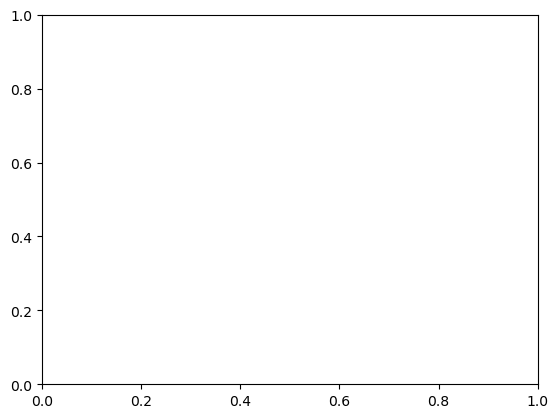

In [3]:
# 方法2: 同时创建figure和axes
fig, ax = plt.subplots()

### 1.1.3 两种使用matplotlib的风格

风格1: 明确的 _面向对象风格_
* 推荐用这个

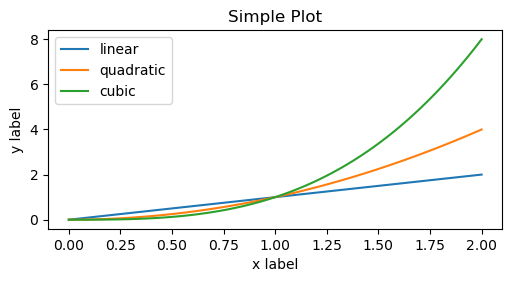

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

风格2: 简单的 _plt简约风_
* 简单画图使用

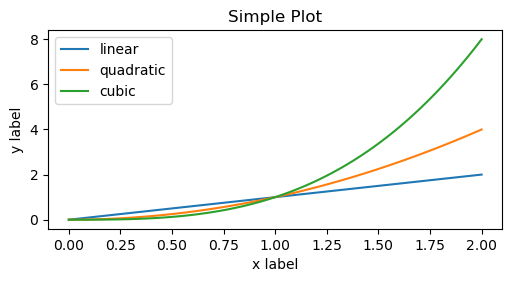

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

### 1.1.4 创建画图函数用于重复作图

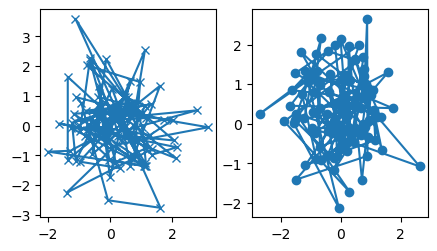

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### 1.1.5 个性化设置
* axes的画图函数中有各种自定义的参数设置
* 也可以用面向对象的方法设置

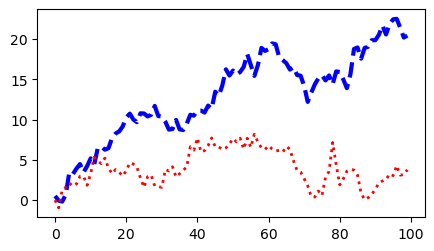

In [7]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')  # 面向对象的方法设置
l.set_color("red")

### 1.1.6 [图中的说明文字](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#labelling-plots)

坐标轴名称, 图标题

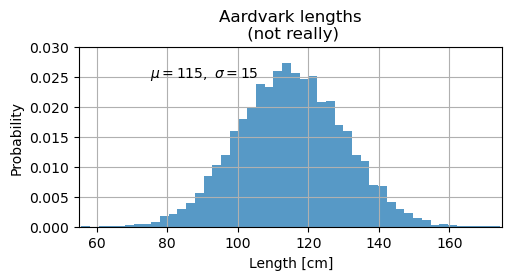

In [8]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

使用数学公式
* r的含义: 将字符串中的TeX字符\不视为python中的转义字符

Text(0.5, 1.0, '$\\sigma_i=15$')

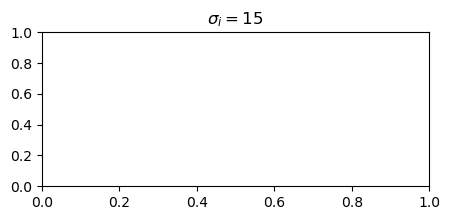

In [9]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title(r'$\sigma_i=15$')

注释

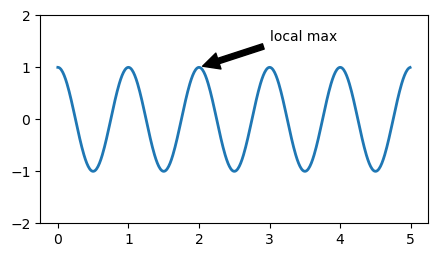

In [10]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

图例

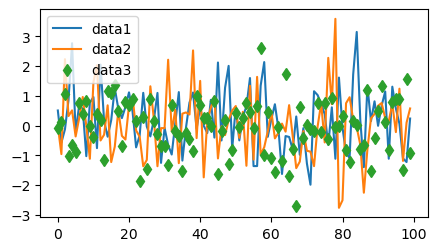

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

### 1.1.7 坐标轴设置

设置坐标轴scales

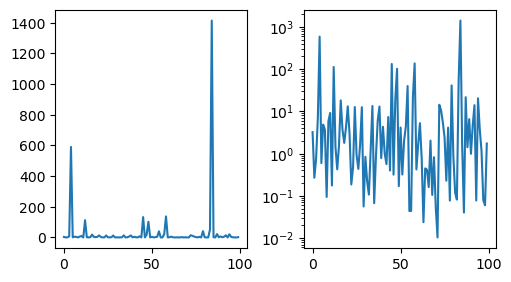

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

设置刻度线和刻度值

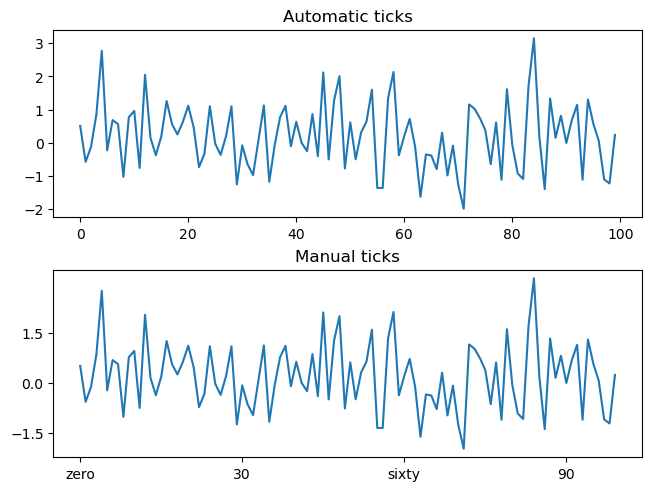

In [13]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

图像数据中含有时间或字符串

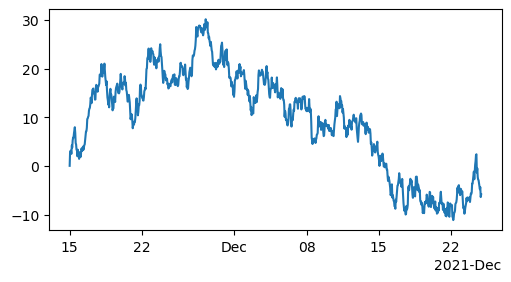

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)

# * 以下两行是matplotlib对时间格式化的操作，用到再看
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

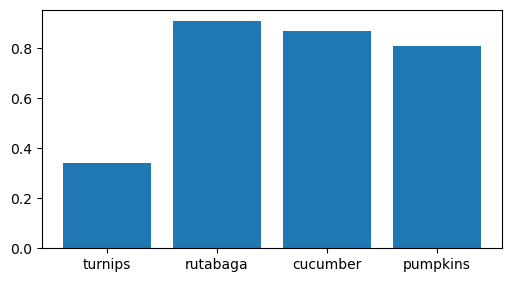

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

[添加新的坐标轴](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#additional-axis-objects)

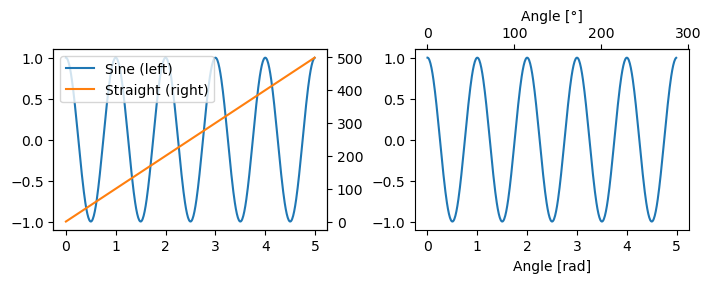

In [33]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()  # * 在与ax1共用x轴的位置上创建新的ax2
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]');

### 1.1.8 [有颜色映射的数据](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#color-mapped-data)

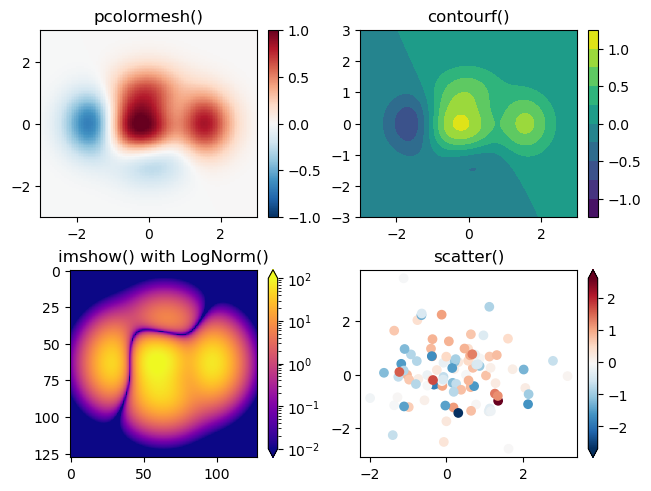

In [35]:
# * 创建一个3维数据进行演示
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');

### 1.1.9 [创建多子图](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#additional-axis-objects)

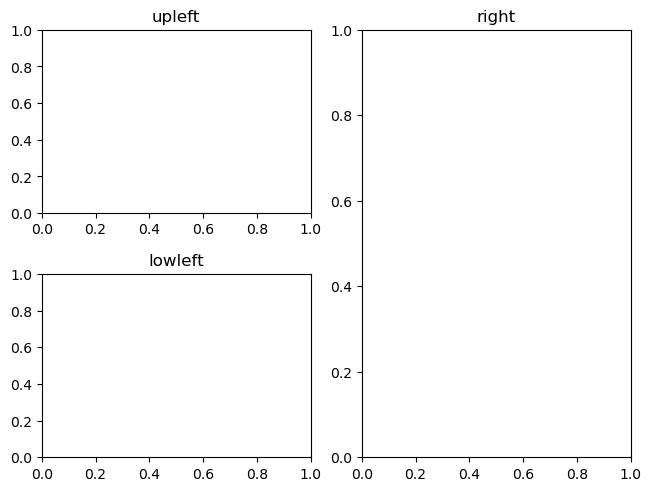

In [36]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

## 1.2 [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

## 1.3 [Image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html)

In [38]:
# 演示用图
path_img = "/Users/rui/Code/1_Astronote/04_matplotlib/material/stinkbug.png"

### 1.3.1 [导入图像数据为数组](https://matplotlib.org/stable/tutorials/introductory/images.html#importing-image-data-into-numpy-arrays)

In [39]:
import matplotlib.image as mpimg
img = mpimg.imread(path_img)
img.shape # 3维数组, RGB image

(375, 500, 3)

### 1.3.2 查看图像

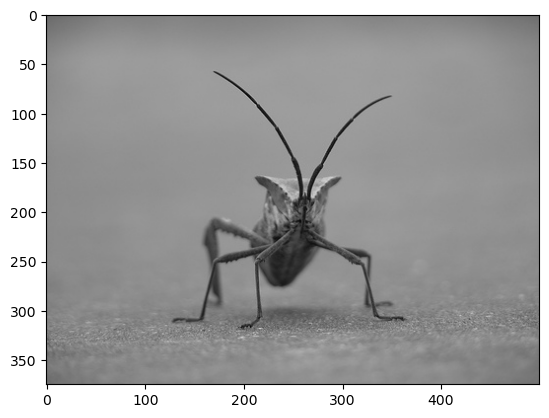

In [41]:
imgplot = plt.imshow(img)

使用伪彩色
* 默认的cmap='viridis'

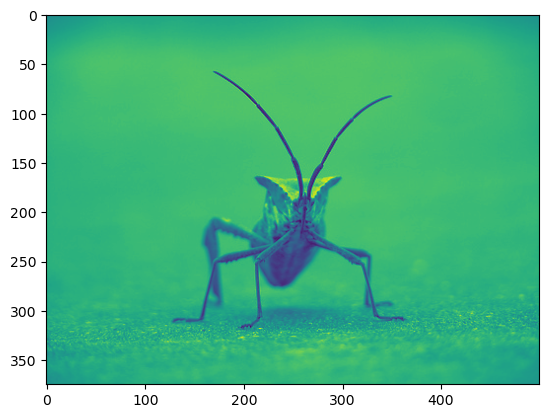

In [47]:
lum_img = img[:, :, 0]
plt.imshow(lum_img);

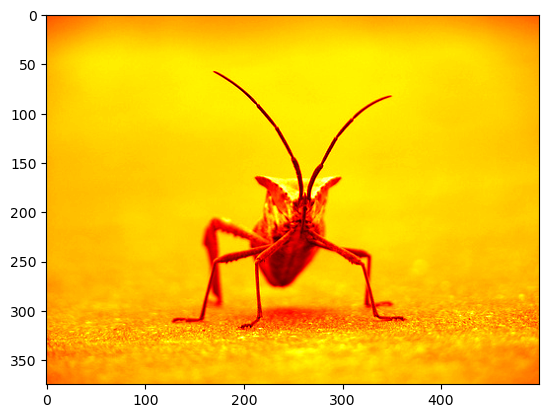

In [49]:
plt.imshow(lum_img, cmap='hot');

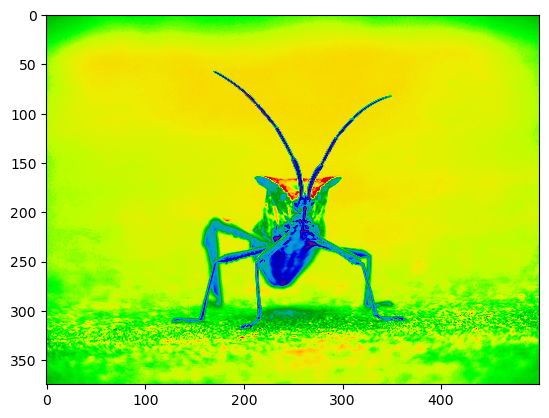

In [50]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')  # 单独设置cmap

添加colorbar用于颜色参考

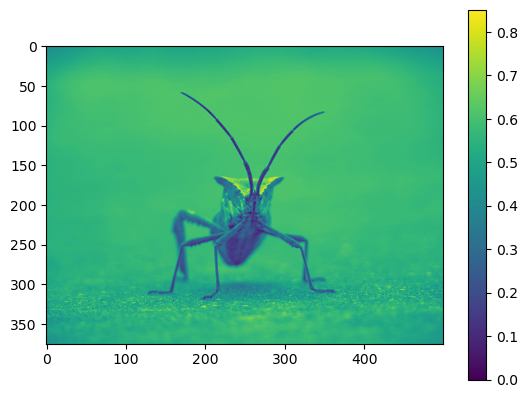

In [51]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

使用直方图查看像素值分布

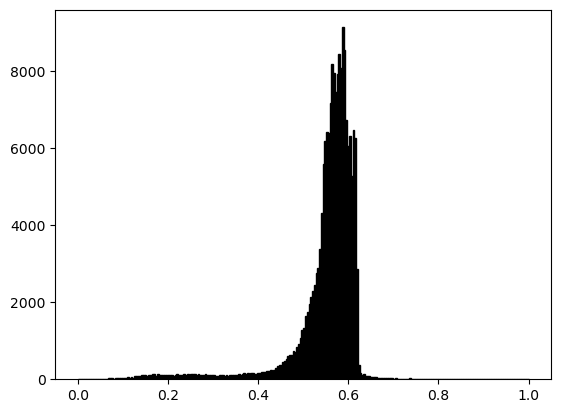

In [63]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

### 1.3.3 图像操作

截断无效信息
* 示例图像的直方图中看出大于0.7的像素非常少
* 可以截断0.7以上的像素, 提高颜色映射的对比度

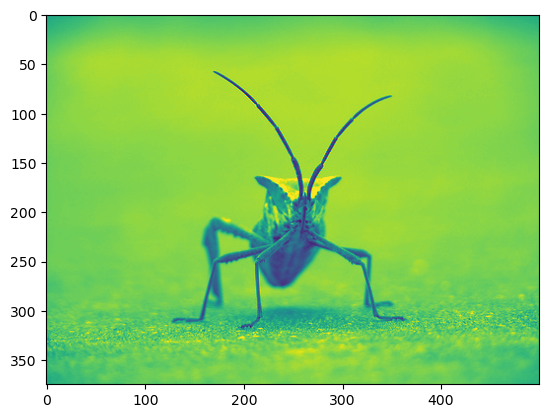

In [64]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

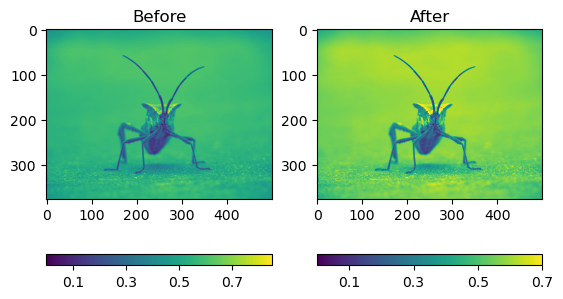

In [65]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

[数组的差值方案](https://matplotlib.org/stable/tutorials/introductory/images.html#array-interpolation-schemes)  
* 差值的作用在于调整像素值(颜色)和像素的映射“应该是什么样”
* 使得展示的映射包含更多的有用信息
* 相比于像素化, 人们更希望图像模糊

新图像的shape: (48, 64, 3)


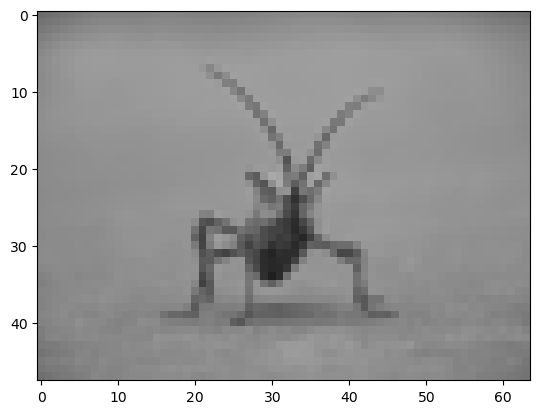

In [77]:
# 使用Pillow library压缩图像
from PIL import Image

img = Image.open(path_img)
img.thumbnail((64, 64))  # resizes image in-place
img = np.array(img)
print(f"新图像的shape: {img.shape}")
imgplot = plt.imshow(img)

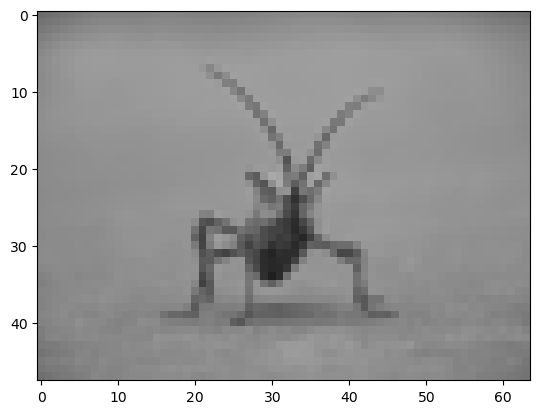

In [78]:
imgplot = plt.imshow(img, interpolation="nearest")

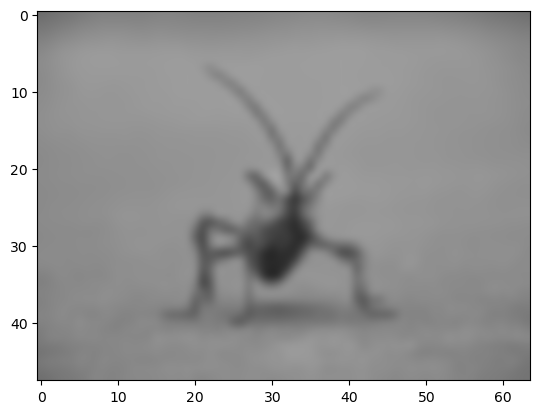

In [80]:
# bicubic差值是常用的图像模糊方案
imgplot = plt.imshow(img, interpolation="bicubic")